In [1]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to C:\Users\Sayan
[nltk_data]     Saha\AppData\Roaming\nltk_data...


In [1]:
import pandas as pd

df = pd.read_csv('merged_trending_videos.csv')
print(df.columns)  # check columns to confirm


Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country'],
      dtype='object')


NameError: name 'SentimentIntensityAnalyzer' is not defined

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
sia = SentimentIntensityAnalyzer()


In [5]:
# Title sentiment
df['title_sentiment'] = df['title'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Tag sentiment
df['tag_sentiment'] = df['tags'].apply(lambda x: sia.polarity_scores(str(x))['compound'])


In [6]:
def get_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['title_sentiment_label'] = df['title_sentiment'].apply(get_label)
df['tag_sentiment_label'] = df['tag_sentiment'].apply(get_label)


In [8]:
df.to_csv('videos_with_sentiment.csv', index=False)
print("✅ Sentiment columns added and saved!")


✅ Sentiment columns added and saved!


In [9]:
print(df['title_sentiment_label'].value_counts()) #from here the phase 3 started



title_sentiment_label
Neutral     70172
Positive    27147
Negative    19898
Name: count, dtype: int64


In [10]:
print(df['tag_sentiment_label'].value_counts())


tag_sentiment_label
Neutral     80215
Positive    24293
Negative    12709
Name: count, dtype: int64


In [11]:
print(df.groupby('country')['title_sentiment_label'].value_counts(normalize=True))


country  title_sentiment_label
IN       Neutral                  0.677982
         Positive                 0.203256
         Negative                 0.118762
UK       Neutral                  0.569637
         Positive                 0.232141
         Negative                 0.198222
US       Neutral                  0.553860
         Positive                 0.256929
         Negative                 0.189211
Name: proportion, dtype: float64


In [16]:
print(df.groupby('category_id')['title_sentiment_label'].value_counts(normalize=True))



category_id  title_sentiment_label
1            Neutral                  0.521581
             Negative                 0.260790
             Positive                 0.217629
2            Neutral                  0.625000
             Positive                 0.293333
             Negative                 0.081667
10           Neutral                  0.626266
             Positive                 0.224755
             Negative                 0.148979
15           Neutral                  0.565546
             Positive                 0.279341
             Negative                 0.155113
17           Neutral                  0.568579
             Positive                 0.289485
             Negative                 0.141937
19           Neutral                  0.513834
             Positive                 0.379447
             Negative                 0.106719
20           Neutral                  0.489704
             Positive                 0.290528
             Negative    

In [17]:
print(df.columns)



Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'title_sentiment',
       'tag_sentiment', 'title_sentiment_label', 'tag_sentiment_label'],
      dtype='object')


In [20]:
avg_score=df.groupby('country')['title_sentiment'].mean().reset_index()

In [22]:
avg_cat=df.groupby('category_id')['title_sentiment'].mean().reset_index()

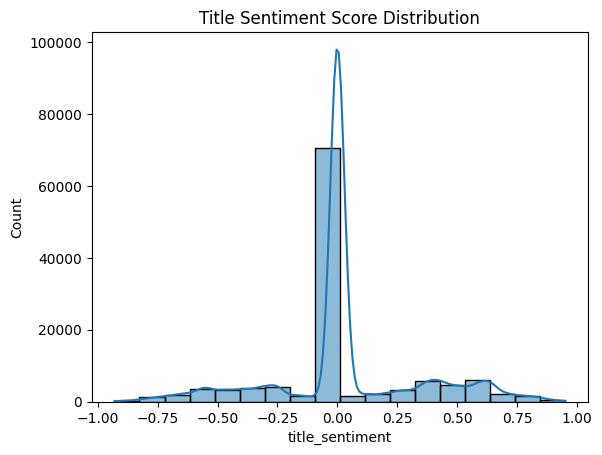

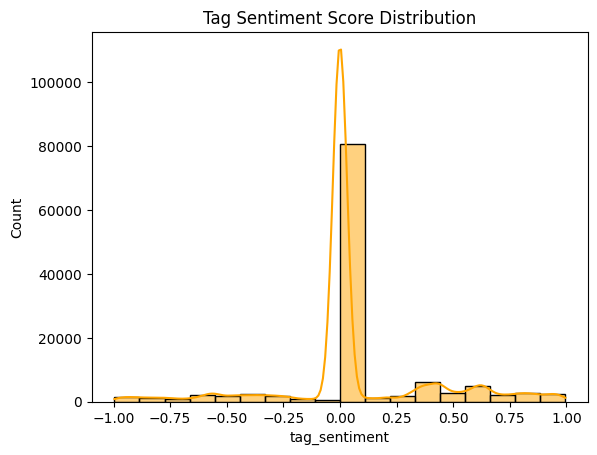

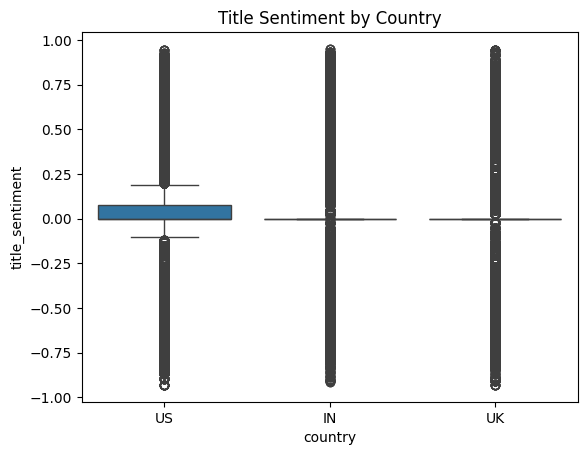

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Titles sentiment score histogram
sns.histplot(df['title_sentiment'], kde=True)
plt.title('Title Sentiment Score Distribution')
plt.show()

# Tags sentiment score histogram
sns.histplot(df['tag_sentiment'], kde=True, color='orange')
plt.title('Tag Sentiment Score Distribution')
plt.show()

# Boxplot by country
sns.boxplot(x='country', y='title_sentiment', data=df)
plt.title('Title Sentiment by Country')
plt.show()
